In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
class SimpleLinearRegression:
    def __init__(self):
        self._intercept = 0
        self._slope = 0
    
    def FitModel(self,X,y):
        
        X_sum = sum(X)
        y_sum = sum(y)
        Xy_sum = sum((X * y))
        X_squared_sum = sum(X ** 2)
        y_squared_sum =  sum(y ** 2)
        
        self._intercept = (
                           ((y_sum * X_squared_sum) - (X_sum * Xy_sum)) / 
                           ((len(X) * X_squared_sum) - (X_sum ** 2))
                          )
        
        self._slope = (
                        ((len(X) * Xy_sum) - (X_sum * y_sum)) / 
                        ((len(X) * X_squared_sum) - (X_sum ** 2))
                      )
        
    def predictor(self,X):
        y_pred = self._intercept + (self._slope * X)
        return y_pred

In [3]:
def fit_intercept_slope(b0, b1):
    def predictor(X):
        yPred = b0 + (b1 * X)
        return yPred
    return predictor

In [4]:
diabetesData = {"Age":np.array([43,21,25,42,57,59]),
                "mg/dL- (Glucose Level)": np.array([99,65,79,75,87,81])}

In [5]:
db_df = pd.DataFrame(diabetesData)

In [6]:
db_df

,Age,mg/dL- (Glucose Level)
0,43,99
1,21,65
2,25,79
3,42,75
4,57,87
5,59,81


In [7]:
X = db_df['Age'].values
y = db_df['mg/dL- (Glucose Level)'].values

In [8]:
X

array([43, 21, 25, 42, 57, 59])

In [9]:
y

array([99, 65, 79, 75, 87, 81])

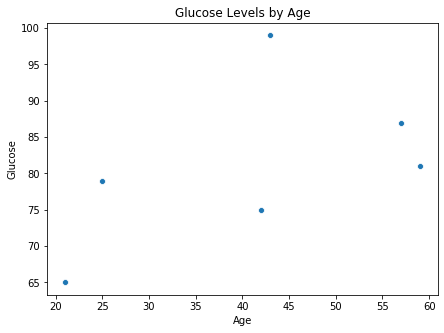

In [10]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=X,y=y).set(xlabel="Age", ylabel = "Glucose", title='Glucose Levels by Age')
plt.show()

# Correlation Coefficient

In [11]:
spearmanr(X,y)

SpearmanrResult(correlation=0.7142857142857143, pvalue=0.1107871720116617)

# Calculate The Values

In [12]:
X_sum = sum(X)
y_sum = sum(y)

In [13]:
X_sum

247

In [14]:
y_sum

486

In [15]:
Xy = X * y

In [16]:
Xy

array([4257, 1365, 1975, 3150, 4959, 4779])

In [17]:
Xy_sum = sum(Xy)

In [18]:
Xy_sum

20485

In [19]:
X_squared = X ** 2

In [20]:
y_squared = y ** 2

In [21]:
X_squared

array([1849,  441,  625, 1764, 3249, 3481], dtype=int32)

In [22]:
y_squared

array([9801, 4225, 6241, 5625, 7569, 6561], dtype=int32)

In [23]:
X_squared_sum = sum(X_squared)
y_squared_sum = sum(y_squared)

In [24]:
X_squared_sum

11409

In [25]:
y_squared_sum

40022

# Put it Together

In [26]:
db_df

,Age,mg/dL- (Glucose Level)
0,43,99
1,21,65
2,25,79
3,42,75
4,57,87
5,59,81


In [27]:
vector_of_sums = np.array([X_sum, y_sum, Xy_sum, X_squared_sum, y_squared_sum])

In [28]:
db_df['Xy'] = Xy
db_df['X_Squared'] = X_squared
db_df['y_Squared'] = y_squared

In [29]:
db_df.loc[len(db_df)] = vector_of_sums

In [30]:
db_df.rename(index={db_df.index[-1]:'Sum'},inplace = True)

In [31]:
db_df

,Age,mg/dL- (Glucose Level),Xy,X_Squared,y_Squared
0,43,99,4257,1849,9801
1,21,65,1365,441,4225
2,25,79,1975,625,6241
3,42,75,3150,1764,5625
4,57,87,4959,3249,7569
5,59,81,4779,3481,6561
Sum,247,486,20485,11409,40022


# Solve for b0 - Intercept

In [32]:
numerator_intercept = (y_sum * X_squared_sum) - (X_sum * Xy_sum)

In [33]:
denominator_intercept = (6 * X_squared_sum) - (X_sum ** 2)

In [34]:
numerator_intercept

484979

In [35]:
denominator_intercept

7445

In [36]:
b0_intercept = numerator_intercept / denominator_intercept

In [37]:
b0_intercept

65.1415715245131

# Solve for b1 - Slope

In [38]:
numerator_slope = (6 * Xy_sum) - (X_sum * y_sum)

In [39]:
denominator_slope = (6 * X_squared_sum) - (X_sum ** 2)

In [40]:
numerator_slope

2868

In [41]:
denominator_slope

7445

In [42]:
b1_slope = numerator_slope / denominator_slope

In [43]:
b1_slope

0.3852249832102082

# Create Trendline

In [44]:
predictor = fit_intercept_slope(b0_intercept, b1_slope)

In [45]:
yPred = predictor(X)

In [46]:
yPred

array([81.7062458 , 73.23129617, 74.7721961 , 81.32102082, 87.09939557,
       87.86984553])

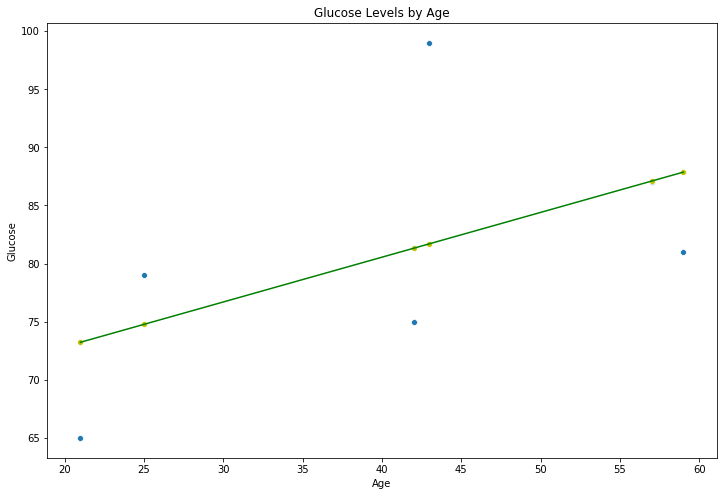

In [47]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=X,y=y).set(xlabel="Age", ylabel = "Glucose", title='Glucose Levels by Age')
sns.scatterplot(x=X,y=yPred,color='y')
sns.lineplot(x=X, y=yPred, color='g')
plt.show()

# Residuals

In [48]:
y

array([99, 65, 79, 75, 87, 81])

In [49]:
yPred

array([81.7062458 , 73.23129617, 74.7721961 , 81.32102082, 87.09939557,
       87.86984553])

In [50]:
residuals = y - yPred
residuals

array([17.2937542 , -8.23129617,  4.2278039 , -6.32102082, -0.09939557,
       -6.86984553])

# Mean Squared Error

In [51]:
residuals

array([17.2937542 , -8.23129617,  4.2278039 , -6.32102082, -0.09939557,
       -6.86984553])

In [52]:
residuals_squared = residuals ** 2
residuals_squared

array([2.99073934e+02, 6.77542367e+01, 1.78743258e+01, 3.99553042e+01,
       9.87947884e-03, 4.71947777e+01])

In [53]:
sum(residuals_squared) / len(y)

78.64374300425344

In [54]:
mean_squared_error(y,yPred)

78.64374300425344

# R Squared

In [55]:
1 - sum(residuals_squared) / sum((y - np.mean(y)) ** 2)

0.2806974725220722

In [56]:
r2_score(y, yPred)

0.2806974725220722

# Compare Results

In [57]:
# The LinearRegression class from sklearn.linear_model intakes features as a column vector instead of a row vector

X_matrix = X.reshape(-1,1)
X_matrix

array([[43],
       [21],
       [25],
       [42],
       [57],
       [59]])

In [58]:
# Instantiate the sklearn.linear_model.LinearRegression class

lm = LinearRegression()

# Instantiate custom SimpleLinearRegresion class

slm = SimpleLinearRegression()

In [59]:
# Fit both linear models

slm.FitModel(X,y)

lm.fit(X_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
lm.intercept_

65.1415715245131

In [61]:
b0_intercept

65.1415715245131

In [62]:
slm._intercept

65.1415715245131

In [63]:
lm.coef_[0]

0.3852249832102082

In [64]:
slm._slope

0.3852249832102082

In [65]:
b1_slope

0.3852249832102082

In [66]:
lm.predict([[43]])[0]

81.70624580255205

In [67]:
predictor(43)

81.70624580255205

In [68]:
slm.predictor(43)

81.70624580255205

In [69]:
lm.predict(X_matrix)

array([81.7062458 , 73.23129617, 74.7721961 , 81.32102082, 87.09939557,
       87.86984553])

In [70]:
predictor(X)

array([81.7062458 , 73.23129617, 74.7721961 , 81.32102082, 87.09939557,
       87.86984553])

In [71]:
slm.predictor(X)

array([81.7062458 , 73.23129617, 74.7721961 , 81.32102082, 87.09939557,
       87.86984553])